# Set up

### Import Data

In [233]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/AceMejiaSanchez/Data/gaussian_small_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Kate/Data/uniform_small_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Fabiana/Demos Fabi/uniform_large_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Ellee/Data/gaussian_large_d_1.tex")

# Creating NumPy array
array = np.array(data)

# Converting to Pandas DataFrame
df = pd.DataFrame(array)

# Look at data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,5.444140,3.835115,3.291091,5.501369,3.428899,4.922020,6.679717,4.207196,5.551717,4.834592,...,5.827100,5.536030,5.505949,3.871041,4.820020,6.893534,4.675085,6.774422,4.013287,1.0
1,4.751552,7.292662,5.983595,6.379493,5.236658,5.765614,5.973641,4.951007,4.739128,5.221459,...,6.917924,6.177616,3.985334,7.088912,6.713774,6.083684,3.632900,4.680444,3.866624,1.0
2,6.271994,6.196881,6.260575,5.059051,7.156964,5.242397,5.938668,6.792579,5.949605,4.961027,...,5.436174,5.076978,5.613830,4.757041,7.940103,5.800670,6.505194,5.033843,8.216384,0.0
3,4.175813,3.704364,3.481604,4.074979,4.708090,5.923180,3.811577,5.946279,5.894935,4.305289,...,3.936844,4.982322,5.583355,3.444634,5.448884,5.031922,5.339520,4.730453,5.299622,1.0
4,5.471645,5.372742,6.487397,5.160722,6.983509,5.484562,8.489674,6.386151,5.103722,6.382228,...,5.699915,4.489785,4.401668,5.614796,6.298538,6.293809,5.578622,6.118113,7.776001,0.0


### Convert 25/150 Columns into CONSECUTIVE Categorical Variables

In [234]:
# Converting 25 columns from numerical floats -> categorical integers
for i in range(25):
    
    df.iloc[:,i] = df.iloc[:,i].round() # Rounding
    df.iloc[:,i] = df.iloc[:,i].astype(int) # Integer

In [235]:
# Checking if it worked
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,5.0,4.0,3.0,6.0,3.0,5.0,7.0,4.0,6.0,5.0,...,5.827100,5.536030,5.505949,3.871041,4.820020,6.893534,4.675085,6.774422,4.013287,1.0
1,5.0,7.0,6.0,6.0,5.0,6.0,6.0,5.0,5.0,5.0,...,6.917924,6.177616,3.985334,7.088912,6.713774,6.083684,3.632900,4.680444,3.866624,1.0
2,6.0,6.0,6.0,5.0,7.0,5.0,6.0,7.0,6.0,5.0,...,5.436174,5.076978,5.613830,4.757041,7.940103,5.800670,6.505194,5.033843,8.216384,0.0
3,4.0,4.0,3.0,4.0,5.0,6.0,4.0,6.0,6.0,4.0,...,3.936844,4.982322,5.583355,3.444634,5.448884,5.031922,5.339520,4.730453,5.299622,1.0
4,5.0,5.0,6.0,5.0,7.0,5.0,8.0,6.0,5.0,6.0,...,5.699915,4.489785,4.401668,5.614796,6.298538,6.293809,5.578622,6.118113,7.776001,0.0


### Train Test Split

In [236]:
from sklearn.model_selection import train_test_split
# Split dataset into X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:150], df.iloc[:,-1], test_size=0.2, random_state=52)

In [237]:
# Forming complete training set by attaching X_train and y_train
train_combined = pd.concat([X_train, y_train], axis = 1)
train_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
159,5.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,...,4.807550,4.514555,5.857739,4.981310,5.346821,5.299885,4.724049,5.912292,5.239725,0.0
198,5.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0,7.0,6.0,...,5.315179,5.872348,5.903941,8.187188,4.729054,4.099837,5.665166,5.280978,6.404870,0.0
259,6.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,6.0,6.0,...,5.305691,5.607511,6.635663,4.042073,3.962510,4.656155,6.207648,3.438525,2.478174,1.0
301,5.0,8.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,5.0,...,6.153676,6.236261,4.695278,6.450229,7.326968,4.941809,5.315609,4.892459,5.075345,0.0
220,5.0,3.0,4.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,...,4.058044,5.085028,4.821349,4.940518,5.662903,4.550320,6.717937,5.276907,5.270538,1.0


# Imbalancing dataset

In [238]:
# Reviewing current class balance/imbalance
print(train_combined.iloc[:, 150].value_counts())

150
1.0    206
0.0    194
Name: count, dtype: int64


## Imbalancing label column (Class 0 Majority)

In [239]:
# Assuming df_table is your DataFrame and the label column is at index 150
# Create a new label column with 300 zeros and 200 ones
label1 = np.array([0] * 250 + [1] * 150)

# Shuffle randomly the new label column
np.random.seed(1)
np.random.shuffle(label1)

# Replace the label column with the new imbalanced labels
train_combined['label_0_majority'] = label1
print(train_combined['label_0_majority'].value_counts())


label_0_majority
0    250
1    150
Name: count, dtype: int64


## Imbalance Label column (Class 1 Majority)

In [240]:
# Create a second imbalanced label column with 200 zeros and 300 ones
label2 = np.array([0] * 150 + [1] * 250)

# Shuffle randomly the new label column
np.random.seed(1)
np.random.shuffle(label2)

# Add the new label column to the DataFrame
train_combined['label_1_majority'] = label2

print(train_combined['label_1_majority'].value_counts())

train_combined = train_combined.drop(columns=[150])

label_1_majority
1    250
0    150
Name: count, dtype: int64


In [241]:
train_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,label_0_majority,label_1_majority
159,5.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,...,4.514555,5.857739,4.981310,5.346821,5.299885,4.724049,5.912292,5.239725,1,1
198,5.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0,7.0,6.0,...,5.872348,5.903941,8.187188,4.729054,4.099837,5.665166,5.280978,6.404870,0,0
259,6.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,6.0,6.0,...,5.607511,6.635663,4.042073,3.962510,4.656155,6.207648,3.438525,2.478174,1,1
301,5.0,8.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,5.0,...,6.236261,4.695278,6.450229,7.326968,4.941809,5.315609,4.892459,5.075345,1,1
220,5.0,3.0,4.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,...,5.085028,4.821349,4.940518,5.662903,4.550320,6.717937,5.276907,5.270538,0,1


# Create subsets for different labels

In [242]:
# Subset for the 1 majority
df_imbalance_0 = train_combined.iloc[:,0:151]
df_imbalance_0.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label_0_majority
159,5.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,...,4.807550,4.514555,5.857739,4.981310,5.346821,5.299885,4.724049,5.912292,5.239725,1
198,5.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0,7.0,6.0,...,5.315179,5.872348,5.903941,8.187188,4.729054,4.099837,5.665166,5.280978,6.404870,0
259,6.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,6.0,6.0,...,5.305691,5.607511,6.635663,4.042073,3.962510,4.656155,6.207648,3.438525,2.478174,1
301,5.0,8.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,5.0,...,6.153676,6.236261,4.695278,6.450229,7.326968,4.941809,5.315609,4.892459,5.075345,1
220,5.0,3.0,4.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,...,4.058044,5.085028,4.821349,4.940518,5.662903,4.550320,6.717937,5.276907,5.270538,0


In [243]:
# Subset for the 0 majority
df_imbalance_1 = train_combined.drop(['label_0_majority'],axis=1)
df_imbalance_1.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label_1_majority
159,5.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,...,4.807550,4.514555,5.857739,4.981310,5.346821,5.299885,4.724049,5.912292,5.239725,1
198,5.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0,7.0,6.0,...,5.315179,5.872348,5.903941,8.187188,4.729054,4.099837,5.665166,5.280978,6.404870,0
259,6.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,6.0,6.0,...,5.305691,5.607511,6.635663,4.042073,3.962510,4.656155,6.207648,3.438525,2.478174,1
301,5.0,8.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,5.0,...,6.153676,6.236261,4.695278,6.450229,7.326968,4.941809,5.315609,4.892459,5.075345,1
220,5.0,3.0,4.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,...,4.058044,5.085028,4.821349,4.940518,5.662903,4.550320,6.717937,5.276907,5.270538,1


# Data Augmentation: SMOTE

In [244]:
# Relevant packages
from imblearn.over_sampling import SMOTE

### SMOTE applied to label_0_majority class

In [245]:
# Creating x and y 
x=df_imbalance_0.drop(['label_0_majority'],axis=1)
y=df_imbalance_0['label_0_majority'] # creating imbalance

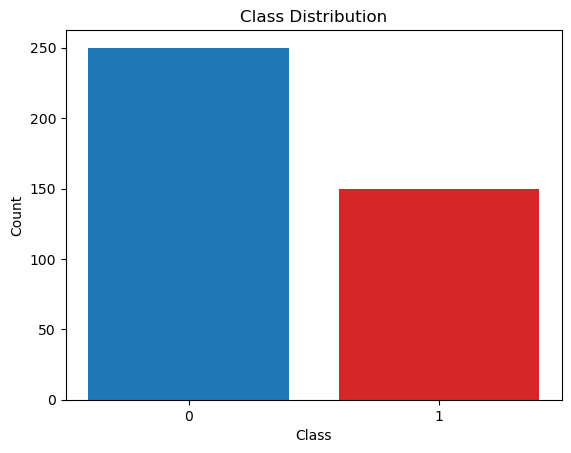

label_0_majority
0    250
1    150
Name: count, dtype: int64

In [246]:
# Data exploration: Classes in label_0_majority
count_class=df_imbalance_0['label_0_majority'].value_counts()
bar_colors = ['tab:blue', 'tab:red']
plt.bar(count_class.index, count_class.values, color=bar_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index)
plt.show()
y.value_counts()

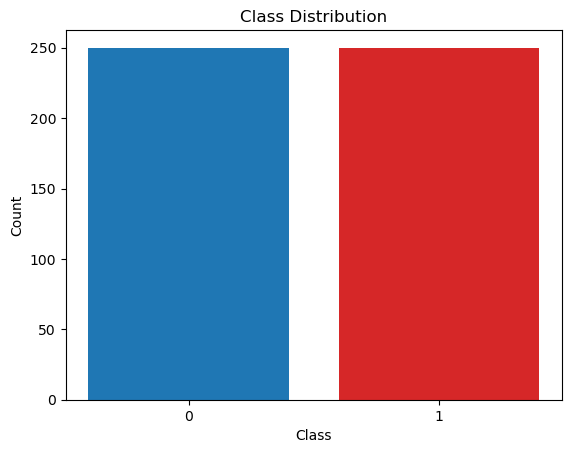

label_0_majority
1    250
0    250
Name: count, dtype: int64

In [247]:
# Applying SMOTE to balance classes
smote=SMOTE(sampling_strategy='minority')  # generating synthetic samples for minority class
x,y=smote.fit_resample(x,y) # re-sampling

count_class=y.value_counts()
bar_colors = ['tab:red', 'tab:blue']
plt.bar(count_class.index, count_class.values, color=bar_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index)
plt.show()
y.value_counts()

In [256]:
# Re-combine balanced x and y into a dataframe
new_train_combined = pd.concat([x, y], axis = 1)

# Sanity checks: making sure the right columns are there & the correct # of class values
print(new_train_combined['label_1_majority'].value_counts()) 
new_train_combined.head()

# Save dataframe 
new_train_combined.to_csv('SMOTE_aug_0_majority.csv', index = False)

label_1_majority
1    250
0    250
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label_1_majority
0,5.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,...,4.807550,4.514555,5.857739,4.981310,5.346821,5.299885,4.724049,5.912292,5.239725,1
1,5.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0,7.0,6.0,...,5.315179,5.872348,5.903941,8.187188,4.729054,4.099837,5.665166,5.280978,6.404870,0
2,6.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,6.0,6.0,...,5.305691,5.607511,6.635663,4.042073,3.962510,4.656155,6.207648,3.438525,2.478174,1
3,5.0,8.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,5.0,...,6.153676,6.236261,4.695278,6.450229,7.326968,4.941809,5.315609,4.892459,5.075345,1
4,5.0,3.0,4.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,...,4.058044,5.085028,4.821349,4.940518,5.662903,4.550320,6.717937,5.276907,5.270538,1


### SMOTE applied to label_1_majority class

In [248]:
# Creating x and y 
x=df_imbalance_1.drop(['label_1_majority'],axis=1)
y=df_imbalance_1['label_1_majority'] # creating imbalance

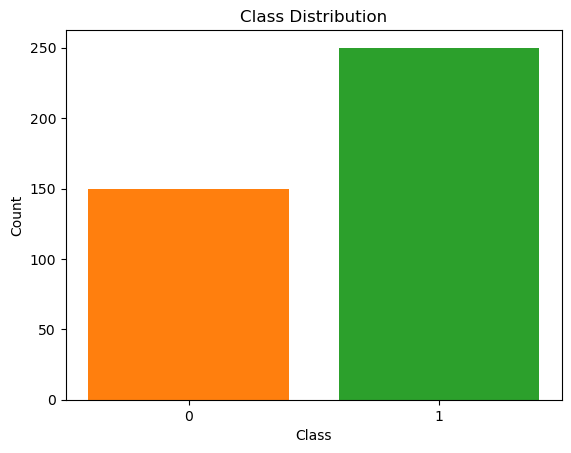

label_1_majority
1    250
0    150
Name: count, dtype: int64

In [249]:
# Data exploration: Classes in label_0_majority
count_class=df_imbalance_1['label_1_majority'].value_counts()
bar_colors = ['tab:green', 'tab:orange']
plt.bar(count_class.index, count_class.values, color=bar_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index)
plt.show()
y.value_counts()

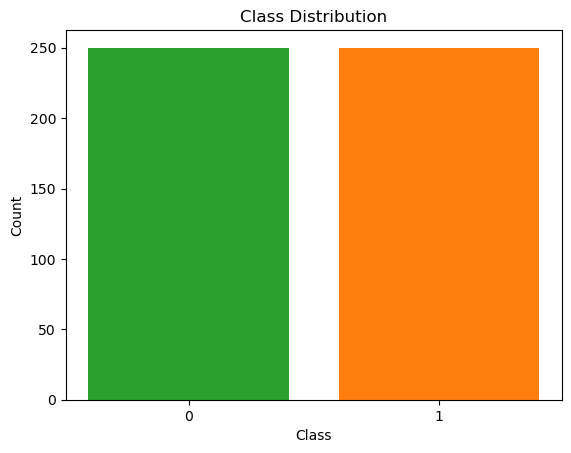

label_1_majority
1    250
0    250
Name: count, dtype: int64

In [250]:
# Applying SMOTE to balance classes
smote=SMOTE(sampling_strategy='minority')  # generating synthetic samples for minority class
x,y=smote.fit_resample(x,y) # re-sampling

count_class=y.value_counts()
bar_colors = ['tab:orange', 'tab:green']
plt.bar(count_class.index, count_class.values, color=bar_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index)
plt.show()
y.value_counts()

# Classifier: XGBoost